In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import gc

In [4]:
import os
os.chdir("/kaggle/input/image-processing")

In [3]:
os.listdir()

['test-20230326T155708Z-001',
 'train-20230326T152931Z-001',
 'val-20230326T152503Z-001']

In [13]:
test_path="test-20230326T155708Z-001/test"
train_path="train-20230326T152931Z-001/train"
val_path="val-20230326T152503Z-001/val"
paths = [test_path,train_path,val_path]

We will be training a VGG-19 model on our custom training dataset to classify among the six categories - Cardiomegaly, Covid,Normal, Pneumonia, Pneumothorax, Tuberculosis. The pre-trained CNN model inputs a color image of dimensions 224×224 of one of the disease categories. However, all the images of the dataset are of different dimensions. Hence, they must all be resized to the required dimension.



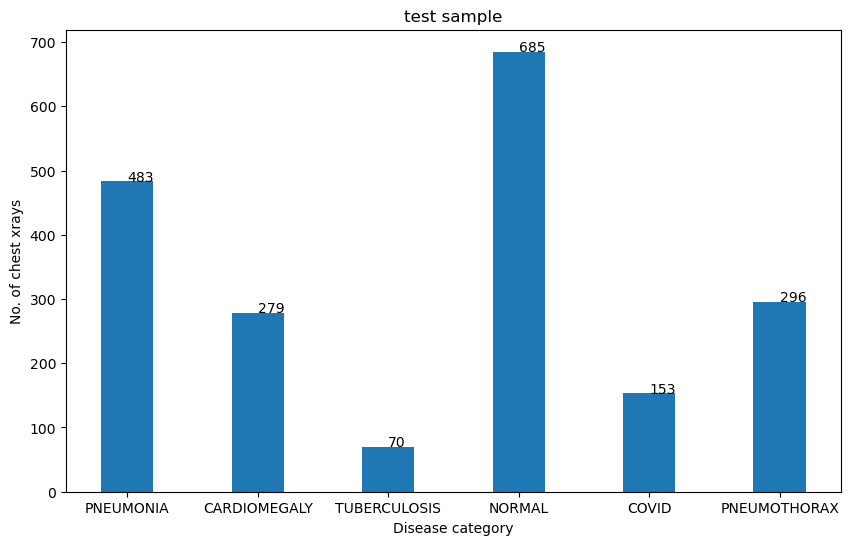

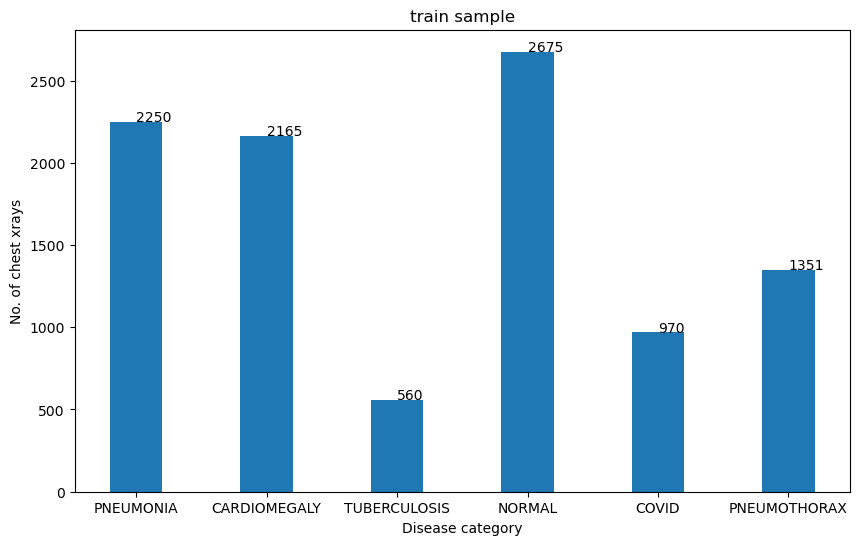

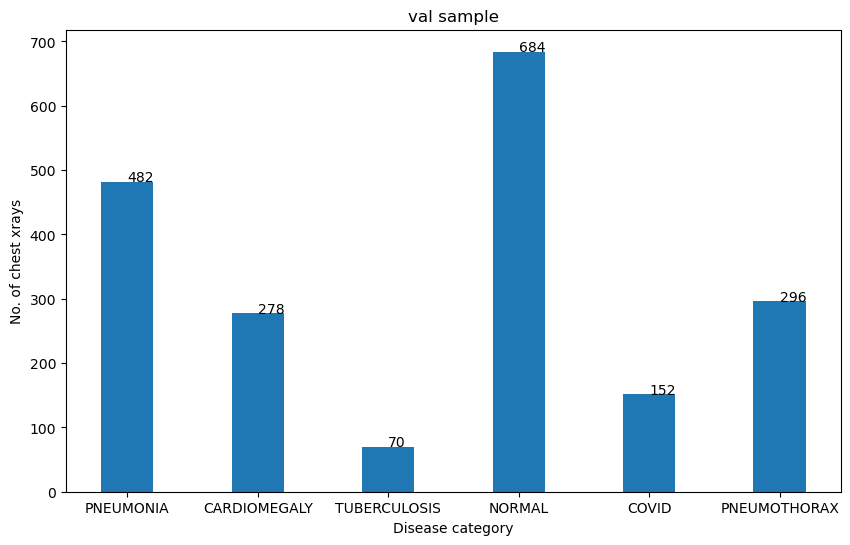

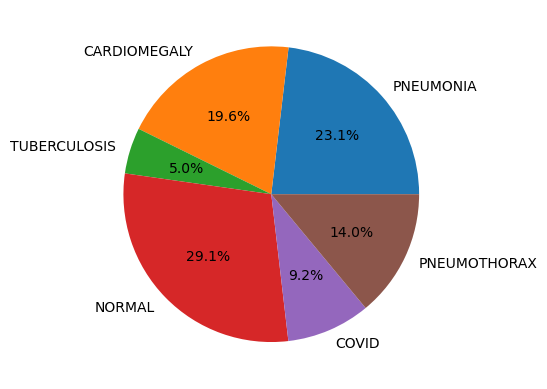

In [28]:
from operator import add
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
tot_y = [0 for _ in range(6)]
for path in paths:
    fig = plt.subplots(figsize =(10, 6))
    x = []
    y = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder
        x.append(folder)
        y.append(len(os.listdir(sub_path)))
    plt.bar(x,y,width = 0.4)
    tot_y = list(map(add, y, tot_y))


    addlabels(x, y)


    plt.xlabel("Disease category")
    plt.ylabel("No. of chest xrays")
    p = path.split('/')
    plt.title(p[1]+" sample")
    plt.show()
    
plt.pie(tot_y, labels = x,autopct='%1.1f%%')
plt.show()


    

In [6]:
x_train=[]
fig = plt.subplots(figsize =(10, 8))
x = []
y = []
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [7]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)
print("done")

done


In [8]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)
print("done")

done


Now, x_train,x_test, and x_val must be divided by 255.0 for normalization.



In [9]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0
print("done")

done


Clearing x_train, x_test and x_val to save memory

Now we need to add labels to the images, which are the 5 diseases and a normal class

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')

Found 9971 images belonging to 6 classes.
Found 1966 images belonging to 6 classes.
Found 1962 images belonging to 6 classes.
done


In [12]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes
print(train_y,test_y,val_y)

[0 0 0 ... 5 5 5] [0 0 0 ... 5 5 5] [0 0 0 ... 5 5 5]


In [13]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((9971,), (1966,), (1962,))

In [14]:
del training_set,test_set,val_set
gc.collect()

69

Preprocessing done, proceeding to the models